#**Umesh Naik**
**24PG00021**
**M.SC. Data Science**

## Flight Price Prediction(EDA + Feature Engineering)

In [500]:
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [501]:
df=pd.read_excel('/content/drive/MyDrive/Flight_Price_Prediction.xlsx')

In [502]:
df.sample(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6992,Jet Airways,18/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,19:10,19:00 19 May,23h 50m,2 stops,No info,16704
3791,Jet Airways,21/05/2019,Kolkata,Banglore,CCU → BOM → BLR,21:10,08:15 22 May,11h 5m,1 stop,No info,14781
367,IndiGo,3/03/2019,Chennai,Kolkata,MAA → CCU,14:40,17:05,2h 25m,non-stop,No info,7295
9562,Multiple carriers,27/06/2019,Delhi,Cochin,DEL → HYD → COK,07:10,16:10,9h,1 stop,In-flight meal not included,6093
5745,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,18:25,10h 25m,1 stop,No info,26890
1874,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,20:35,16:10 13 Mar,19h 35m,1 stop,In-flight meal not included,11087
5993,IndiGo,12/06/2019,Kolkata,Banglore,CCU → MAA → BLR,08:10,13:00,4h 50m,1 stop,No info,5069
8357,IndiGo,6/03/2019,Delhi,Cochin,DEL → BLR → COK,05:05,10:05,5h,1 stop,No info,7894
176,IndiGo,3/04/2019,Delhi,Cochin,DEL → BOM → COK,20:25,01:30 04 Apr,5h 5m,1 stop,No info,5073
7380,IndiGo,3/04/2019,Banglore,Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,4823


In [503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [504]:
df.duplicated().sum()

np.int64(220)

In [505]:
# remove duplicated values

df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [506]:
# Fetaure Engineering Process
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]

In [507]:
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,06
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,12,03
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270,01,03
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,12,03
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625,27,05


In [508]:
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)

In [509]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10463 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10463 non-null  object
 1   Date_of_Journey  10463 non-null  object
 2   Source           10463 non-null  object
 3   Destination      10463 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10463 non-null  object
 6   Arrival_Time     10463 non-null  object
 7   Duration         10463 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10463 non-null  object
 10  Price            10463 non-null  int64 
 11  Date             10463 non-null  int64 
 12  Month            10463 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 1.4+ MB


In [510]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [511]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [512]:
df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x : x.split(' ')[0])

In [513]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [514]:
df['Arrival_hour']=df['Arrival_Time'].str.split(':').str[0]
df['Arrival_min']=df['Arrival_Time'].str.split(':',).str[1]

In [515]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,21,35


In [516]:
df['Arrival_hour']=df['Arrival_hour'].astype(int)
df['Arrival_min']=df['Arrival_min'].astype(int)

In [517]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [518]:
df.sample(5)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Arrival_hour,Arrival_min
5758,IndiGo,Kolkata,Banglore,CCU → BLR,17:15,2h 45m,non-stop,No info,6985,3,3,20,0
2984,Air India,Delhi,Cochin,DEL → BOM → COK,13:00,6h 15m,1 stop,No info,8372,21,5,19,15
6570,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,19:00,6h 30m,1 stop,No info,7198,24,6,1,30
6698,IndiGo,Chennai,Kolkata,MAA → CCU,14:45,2h 20m,non-stop,No info,3597,27,6,17,5
10314,SpiceJet,Kolkata,Banglore,CCU → MAA → BLR,15:05,5h 15m,1 stop,No info,4859,24,4,20,20


In [519]:
df['Dept_hour']=df['Dep_Time'].str.split(':').str[0]
df['Dept_min']=df['Dep_Time'].str.split(':').str[1]
df['Dept_hour']=df['Dept_hour'].astype(int)
df['Dept_min']=df['Dept_min'].astype(int)
df.drop('Dep_Time',axis=1,inplace=True)

In [520]:
df.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,21,35,16,50


In [521]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10463 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10463 non-null  object
 1   Source           10463 non-null  object
 2   Destination      10463 non-null  object
 3   Route            10462 non-null  object
 4   Duration         10463 non-null  object
 5   Total_Stops      10462 non-null  object
 6   Additional_Info  10463 non-null  object
 7   Price            10463 non-null  int64 
 8   Date             10463 non-null  int64 
 9   Month            10463 non-null  int64 
 10  Arrival_hour     10463 non-null  int64 
 11  Arrival_min      10463 non-null  int64 
 12  Dept_hour        10463 non-null  int64 
 13  Dept_min         10463 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 1.4+ MB


In [522]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [523]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})

In [524]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Arrival_hour,Arrival_min,Dept_hour,Dept_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,5,9,25,9,45


In [525]:
df.drop('Route',axis=1,inplace=True)

In [526]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302,1,3,21,35,16,50


In [527]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [528]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10463 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10463 non-null  object 
 1   Source           10463 non-null  object 
 2   Destination      10463 non-null  object 
 3   Duration         10463 non-null  object 
 4   Total_Stops      10462 non-null  float64
 5   Additional_Info  10463 non-null  object 
 6   Price            10463 non-null  int64  
 7   Date             10463 non-null  int64  
 8   Month            10463 non-null  int64  
 9   Arrival_hour     10463 non-null  int64  
 10  Arrival_min      10463 non-null  int64  
 11  Dept_hour        10463 non-null  int64  
 12  Dept_min         10463 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.4+ MB


In [529]:
df['duration_hour']=df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df['duration_min']=df['Duration'].str.split(' ').str[1].str.split('m').str[0]
df['duration_min'] = df['duration_min'].replace(np.nan, '0')
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302,1,3,21,35,16,50,4,45


In [530]:
df[df['duration_hour']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour,duration_min
6474,Air India,Mumbai,Hyderabad,5m,2.0,No info,17327,6,3,16,55,16,50,5m,0


In [531]:
df.drop(6474,axis=0,inplace=True)

In [532]:
df['duration_hour']=df['duration_hour'].astype('int')

In [533]:
df.drop('Duration',axis=1,inplace=True)

In [534]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,0.0,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2.0,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2.0,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1.0,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1.0,No info,13302,1,3,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0.0,No info,4107,9,4,22,25,19,55,2,30
10679,Air India,Kolkata,Banglore,0.0,No info,4145,27,4,23,20,20,45,2,35
10680,Jet Airways,Banglore,Delhi,0.0,No info,7229,27,4,11,20,8,20,3,0
10681,Vistara,Banglore,New Delhi,0.0,No info,12648,1,3,14,10,11,30,2,40


In [535]:
# pie chart of airlines

import altair as alt

airline_counts = df['Airline'].value_counts().reset_index()
airline_counts.columns = ['Airline', 'Count']

base = alt.Chart(airline_counts).encode(
    theta=alt.Theta("Count:Q", stack=True)
)

pie = base.mark_arc(outerRadius=200).encode(
    color=alt.Color("Airline:N"),
    order=alt.Order("Count", sort="descending"),
    tooltip=["Airline", "Count"]
)

text = base.mark_text(radius=220).encode(
    text=alt.Text("Count:Q"),
    order=alt.Order("Count", sort="descending"),
    color=alt.value("black")
)

chart = (pie + text).properties(
    title='Distribution of Airlines',
    width=600,
    height=600
)

chart

alt.LayerChart(...)

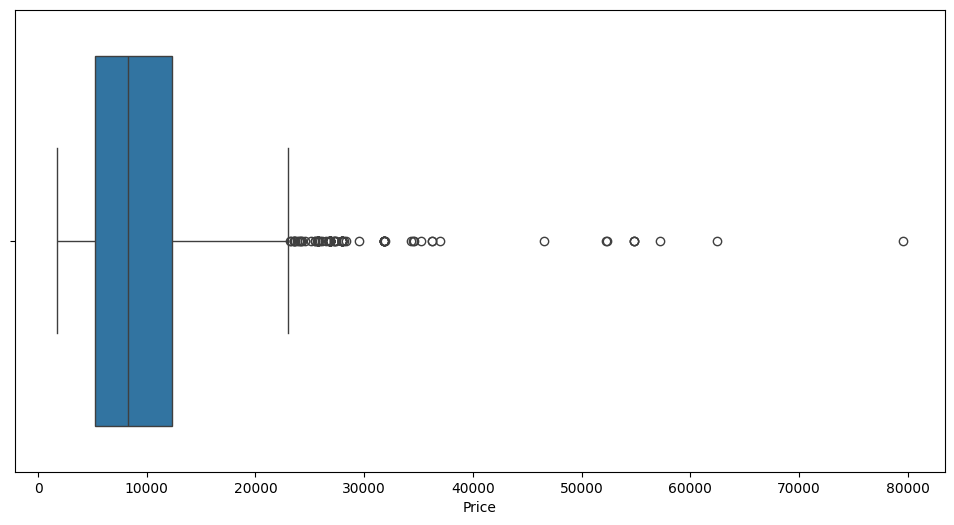

In [536]:
# boxplot for price
plt.figure(figsize=(12,6))
sns.boxplot(x='Price',data=df)
plt.show()

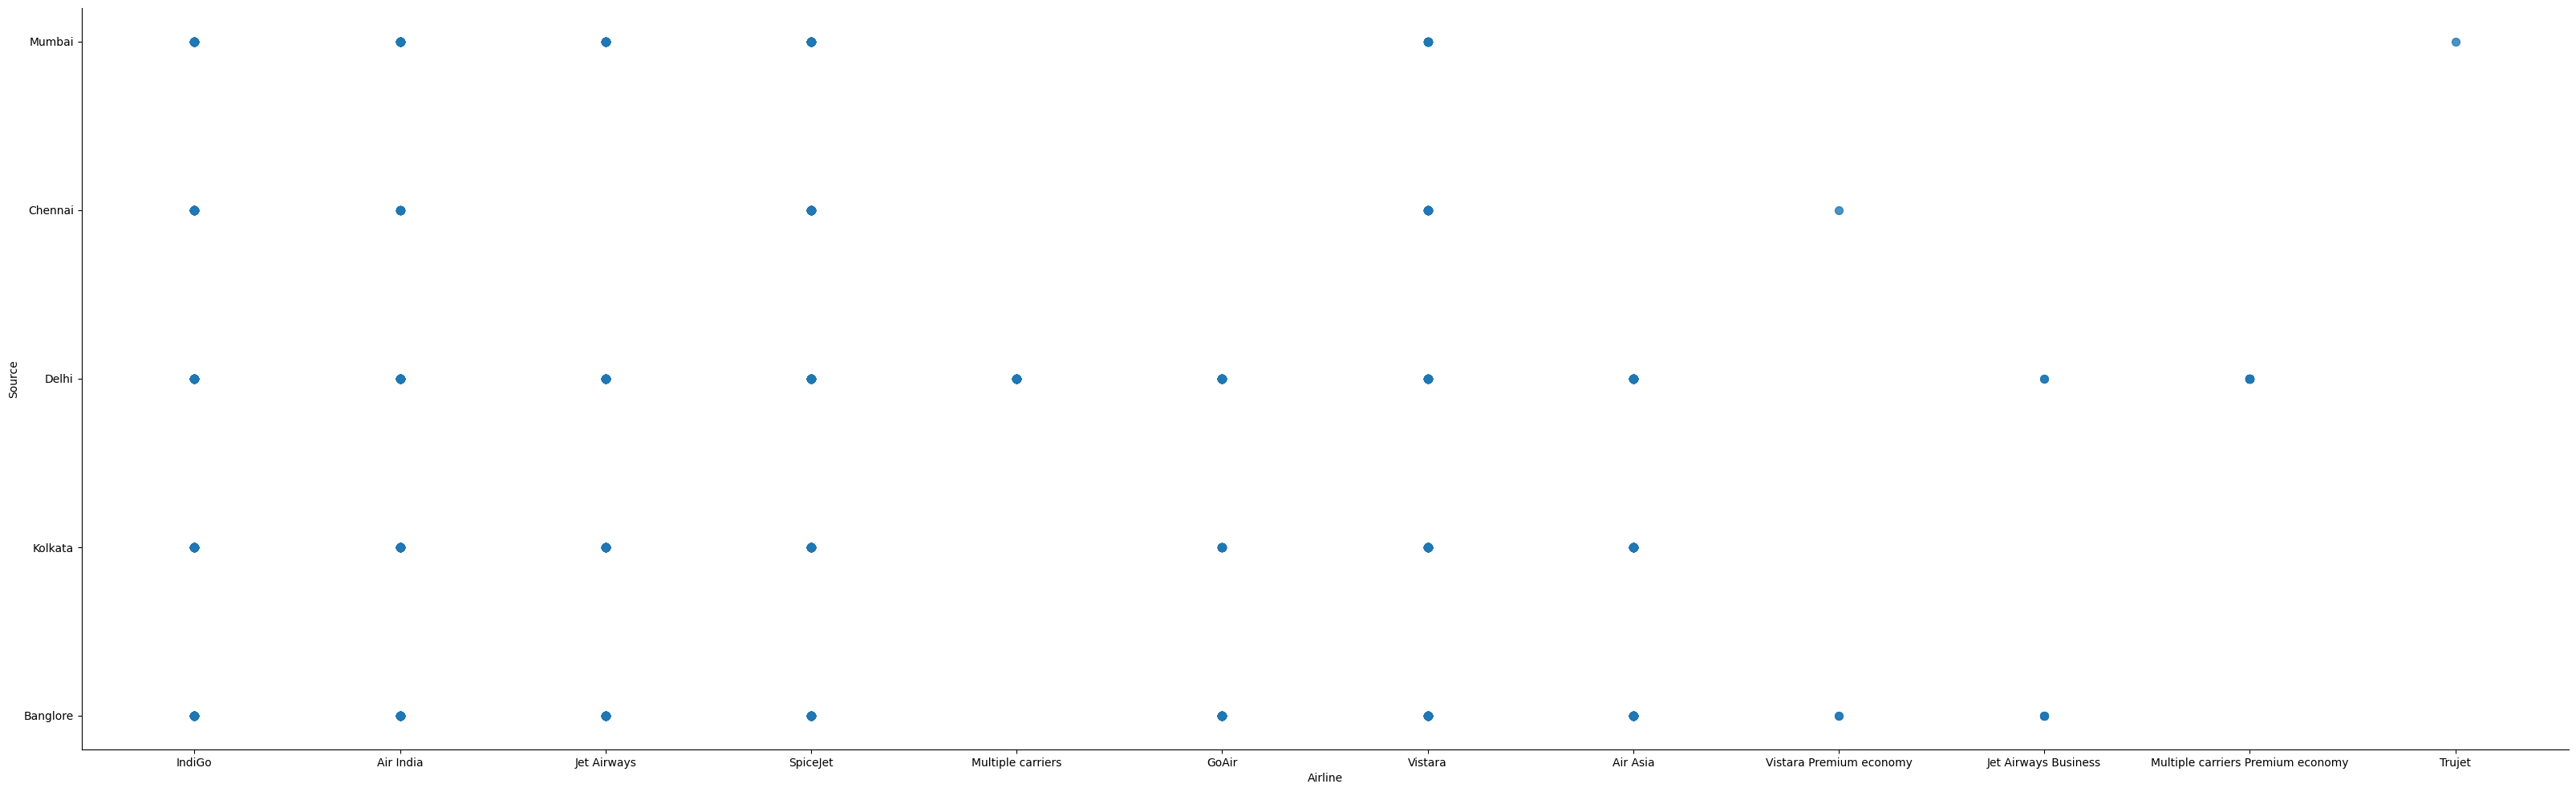

In [537]:
# scatter plot for source vs airline
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Airline', y='Source', s=50, alpha=.8, figsize=(40, 12))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [538]:
#  heatmap for source vs destination

# Heatmap for Source vs Destination
import altair as alt

# Calculate the count of flights for each Source-Destination pair
source_destination_counts = df.groupby(['Source', 'Destination']).size().reset_index(name='Count')

# Create the heatmap using Altair
heatmap = alt.Chart(source_destination_counts).mark_rect().encode(
    x=alt.X('Source:O', title='Source City'),
    y=alt.Y('Destination:O', title='Destination City'),
    color=alt.Color('Count:Q', scale=alt.Scale(range='heatmap')),
    tooltip=['Source', 'Destination', 'Count']
).properties(
    title='Flight Count by Source and Destination',
    width=800,
    height=800
)

heatmap.display()

alt.Chart(...)

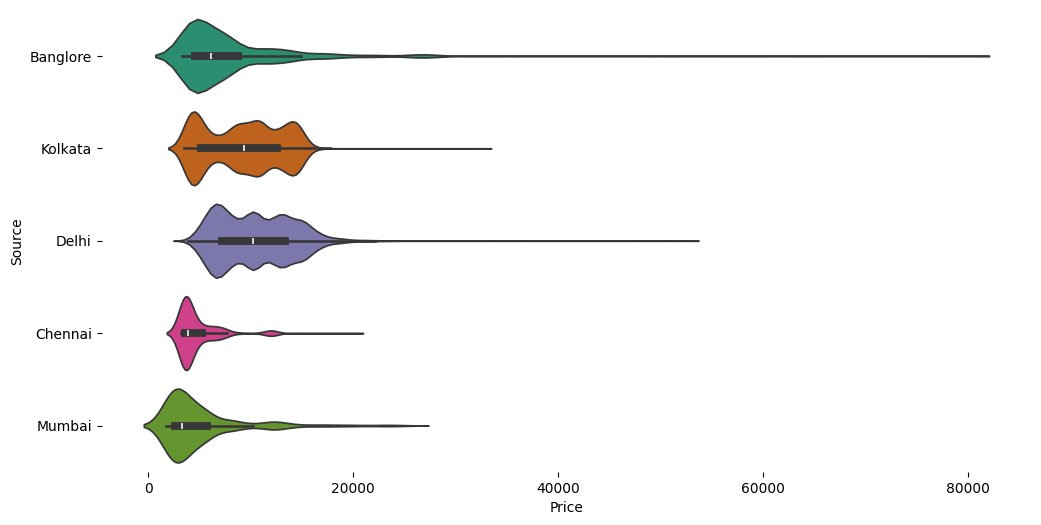

In [539]:
# violinplot for source vs price
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Source'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Price', y='Source', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

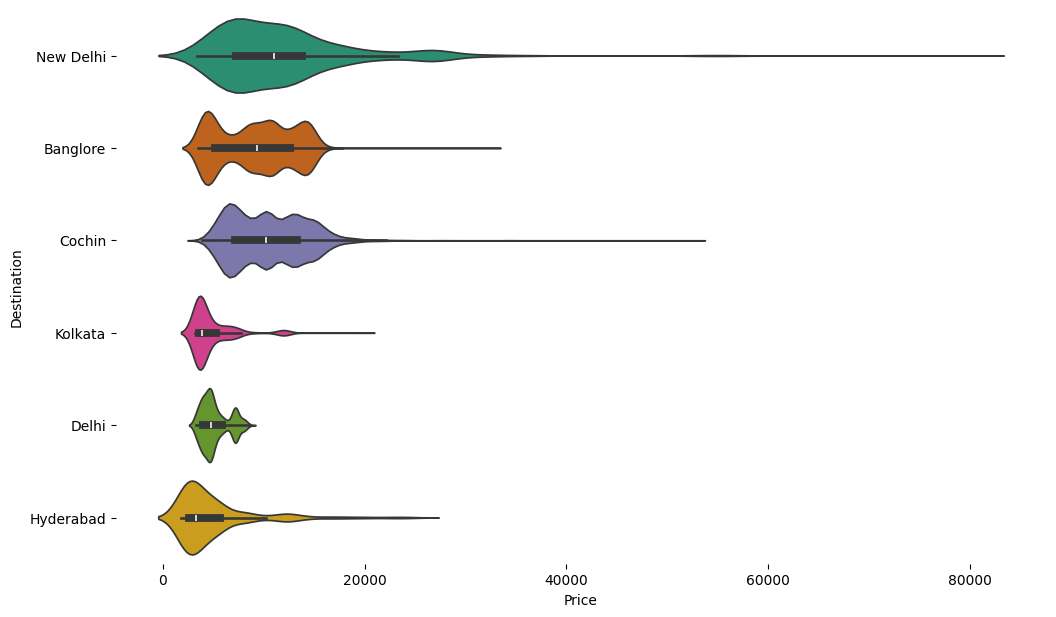

In [540]:
# violinplot for destination vs price
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Destination'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Price', y='Destination', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

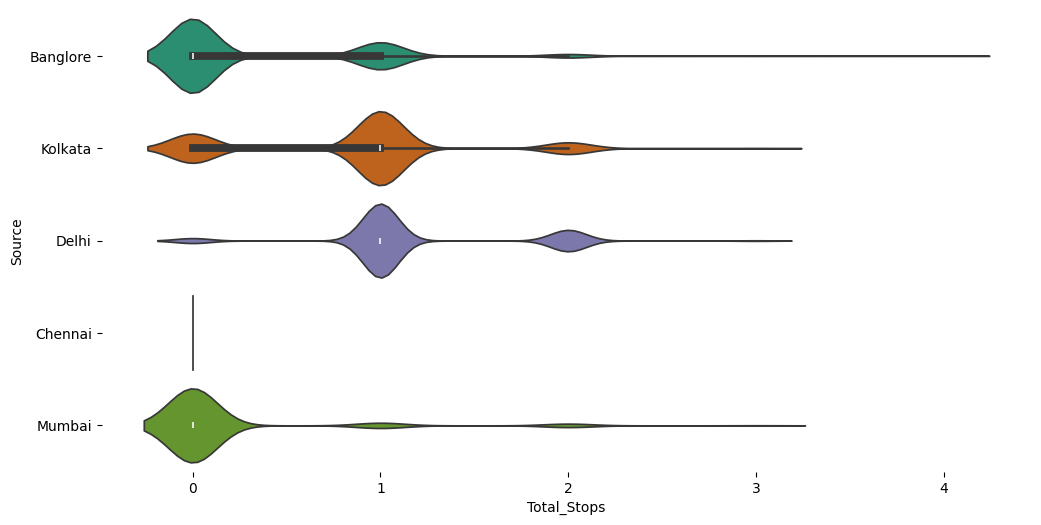

In [541]:
# violinplot for source vs total stops
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Source'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Total_Stops', y='Source', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

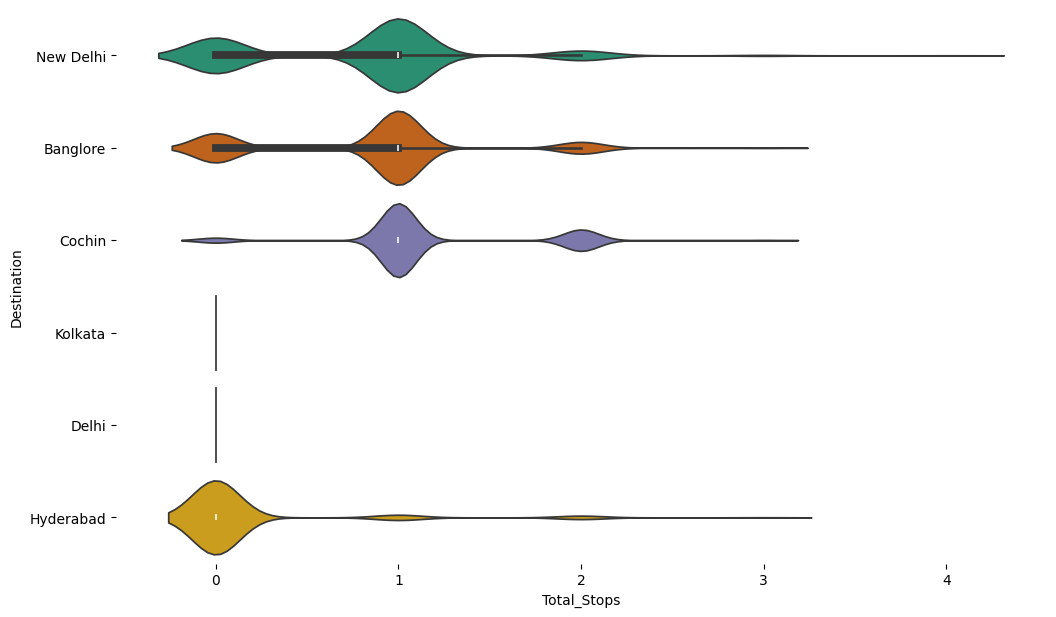

In [542]:
# violinplot for destination vs total stops
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Destination'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Total_Stops', y='Destination', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [543]:
!pip install "vegafusion[embed]>=1.6.0"

In [544]:
!pip install "vl-convert-python>=1.6.0"

In [545]:
# Bar chart for source
import altair as alt
alt.data_transformers.enable("vegafusion")
chart = alt.Chart(df).mark_bar().encode(
    x='Source',
    y='count()',
    tooltip=['Source', 'count()']
).properties(
    title='Count of Flights by Source',
    width=600,
    height=400
)

chart.display()

alt.Chart(...)

In [546]:
# Bar chart for destination

alt.data_transformers.enable("vegafusion")
chart = alt.Chart(df).mark_bar().encode(
    x='Destination',
    y='count()',
    tooltip=['Destination', 'count()']
).properties(
    title='Count of Flights by Destination',
    width=600,
    height=400
)

chart.display()

alt.Chart(...)

In [547]:
# Histogram for Total Stops

alt.data_transformers.enable("vegafusion")
chart = alt.Chart(df).mark_bar().encode(
    x=alt.X('Total_Stops:O'),
    y='count()',
    tooltip=[alt.Tooltip('Total_Stops:O', bin=True, title='Total Stops'), 'count()']
).properties(
    title='Distribution of Total Stops',
    width=600,
    height=400
)

chart.display()

alt.Chart(...)

In [548]:
# Histogram for Month include tooltip

alt.data_transformers.enable("vegafusion")
chart = alt.Chart(df).mark_bar().encode(
    x=alt.X('Month:O'),
    y='count()',
    tooltip=[alt.Tooltip('Month:O', bin=True, title='Month'), 'count()']
).properties(
    title='Distribution of Months',
    width=600,
    height=400
)

chart.display()

alt.Chart(...)

In [549]:
# prompt: Histogram for Date include tooltip

alt.data_transformers.enable("vegafusion")
chart = alt.Chart(df).mark_bar().encode(
    x=alt.X('Date:O'),
    y='count()',
    tooltip=[alt.Tooltip('Date:O', bin=True, title='Date'), 'count()']
).properties(
    title='Distribution of Dates',
    width=600,
    height=400
)

chart.display()

alt.Chart(...)

In [550]:
# Histogram for Price include tooltip

alt.data_transformers.enable("vegafusion")
chart = alt.Chart(df).mark_bar().encode(
    alt.X('Price'),
    y='count()',
    tooltip=[alt.Tooltip('Price', bin=True), 'count()']
).properties(
    title='Distribution of Prices',
    width=600,
    height=400
)

chart.display()

alt.Chart(...)

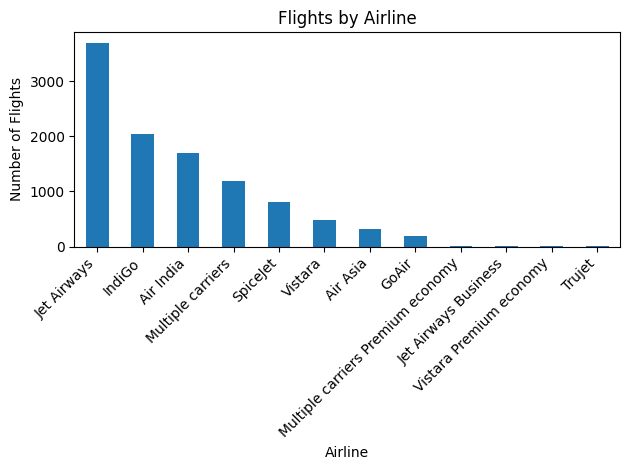

In [551]:
# Barplot of Flights by Airline
import matplotlib.pyplot as plt
df['Airline'].value_counts().plot(kind='bar')
plt.title('Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Average Price by Airline:
Airline
Trujet                                4140.000000
SpiceJet                              4335.841718
Air Asia                              5590.260188
IndiGo                                5668.469897
GoAir                                 5861.056701
Vistara                               7801.355649
Vistara Premium economy               8962.333333
Air India                             9550.795159
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11599.021081
Jet Airways Business                 58358.666667
Name: Price, dtype: float64


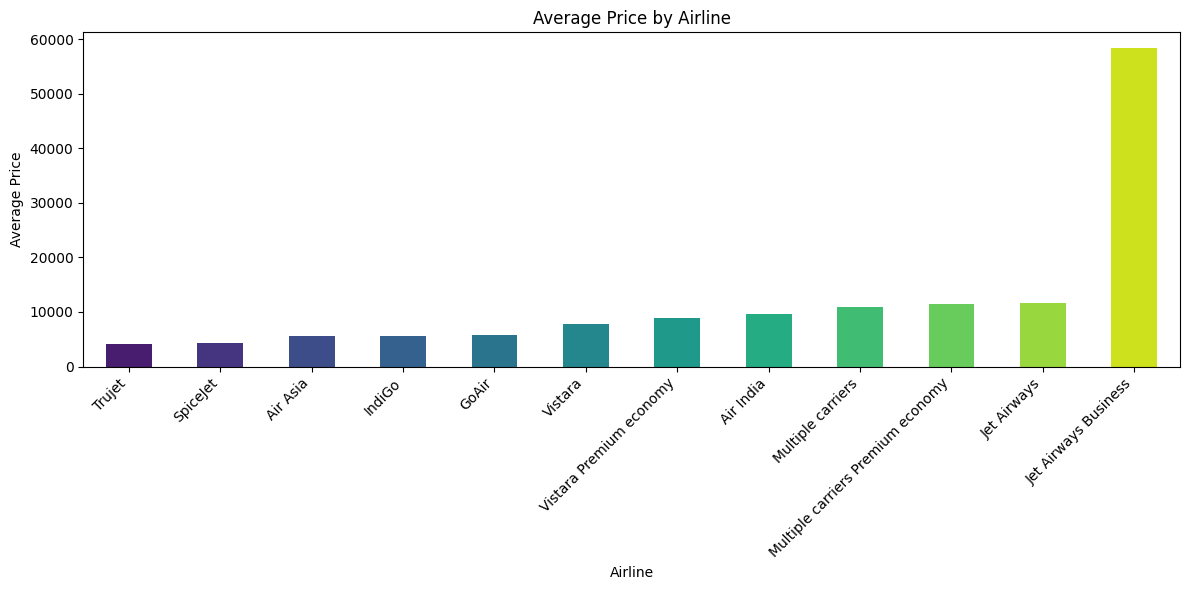

In [552]:
# Average Price by Airline

import matplotlib.pyplot as plt
# Group by 'Airline' and calculate the mean of 'Price'
average_price_by_airline = df.groupby('Airline')['Price'].mean().sort_values()
print("Average Price by Airline:")
print(average_price_by_airline)

# Plot the average price by airline
plt.figure(figsize=(12, 6))
average_price_by_airline.plot(kind='bar', color=sns.color_palette('viridis', len(average_price_by_airline)))
plt.title('Average Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [553]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [554]:
# Encode categorical variables
for col in ['Airline', 'Source', 'Destination', 'Additional_Info']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

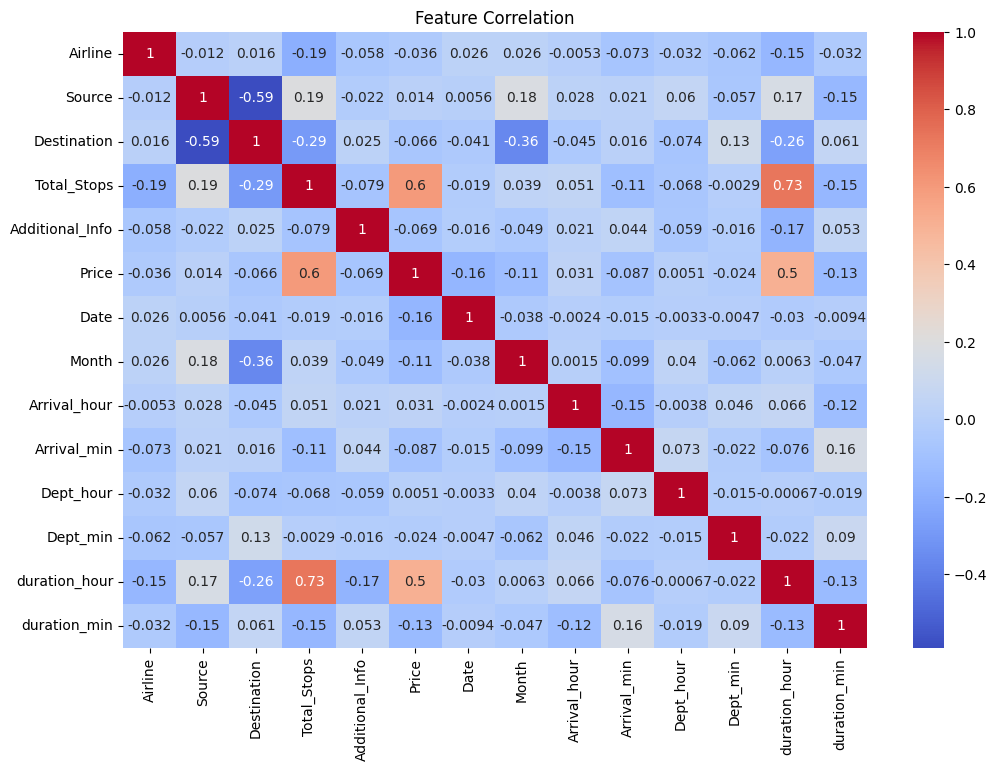

In [555]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

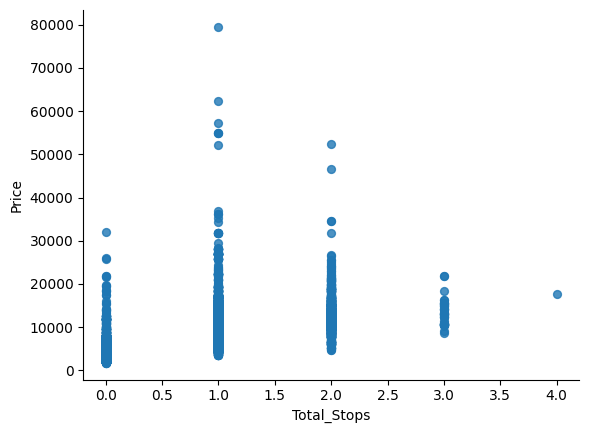

In [556]:
# price vs total stops plot
import matplotlib.pyplot as plt
df.plot(kind='scatter', x='Total_Stops', y='Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

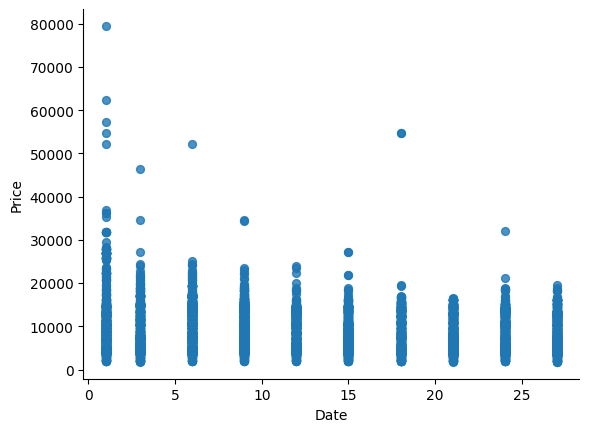

In [557]:
# price vs date plot
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Date', y='Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

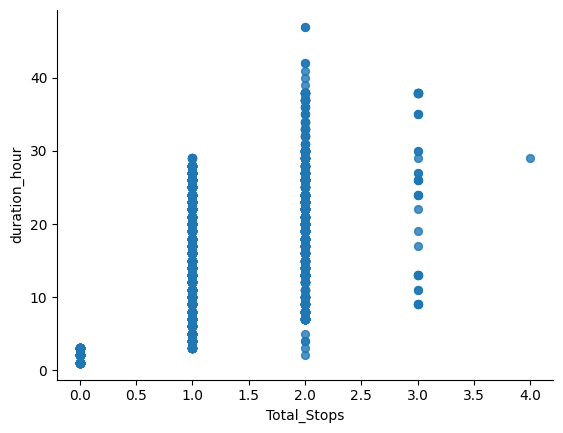

In [558]:
# duration hour vs total stops
import matplotlib.pyplot as plt
df.plot(kind='scatter', x='Total_Stops', y='duration_hour', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

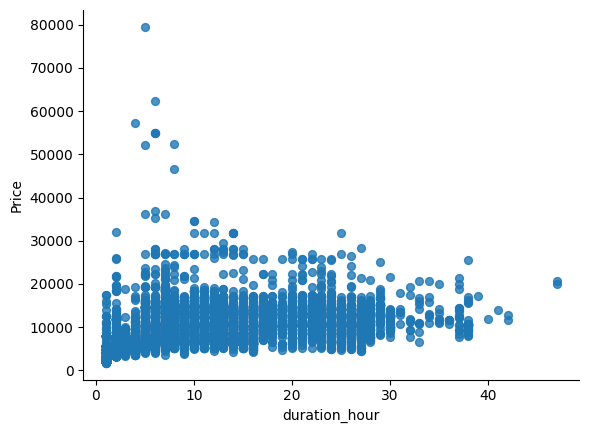

In [559]:
# duration hour vs price
import matplotlib.pyplot as plt
df.plot(kind='scatter', x='duration_hour', y='Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [560]:
# Prepare data
X = df.drop('Price', axis=1)
y = df['Price']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("R2 Score:", r2_score(y_test, y_pred))

# Calculate MSE first, then take the square root for RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

R2 Score: 0.870057961136697
RMSE: 1619.7603194772284


In [564]:
# actual vs predicted values
chart = alt.Chart(results_df).mark_point().encode(
    x='Actual Price:Q',
    y='Predicted Price:Q',
    tooltip=['Actual Price', 'Predicted Price']
).properties(
    title='Actual vs. Predicted Prices',
    width=600,
    height=400
)

diagonal = alt.Chart(pd.DataFrame({'x': [results_df['Actual Price'].min(), results_df['Actual Price'].max()]})).mark_line(color='red').encode(
    x='x:Q',
    y='x:Q'
)

chart = chart + diagonal
chart.display()

alt.LayerChart(...)

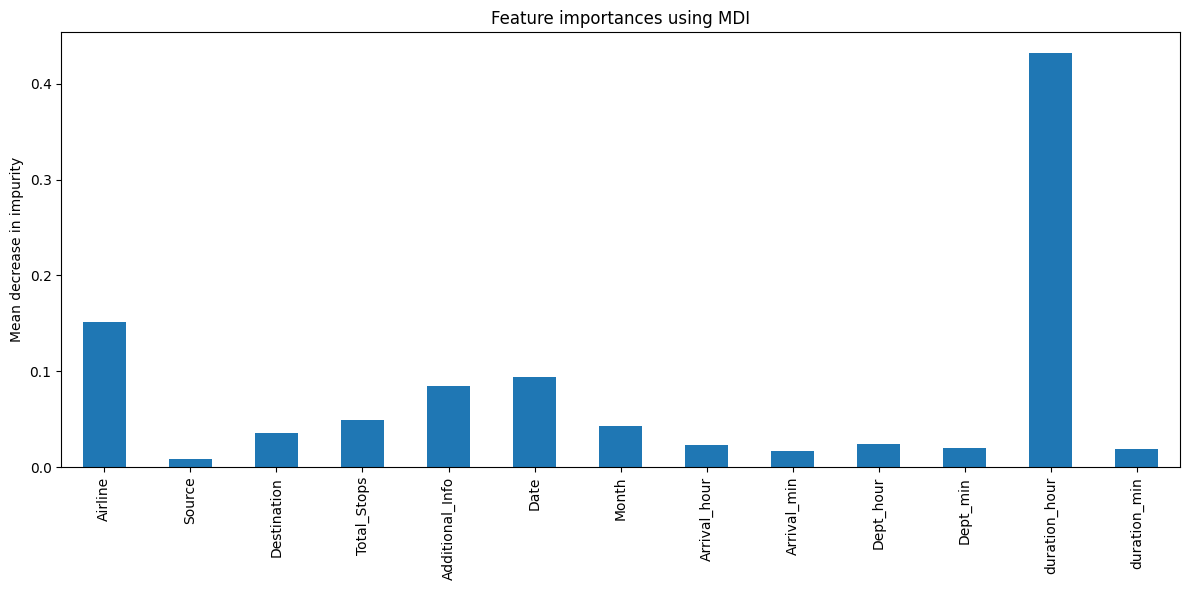

In [565]:
# feature importance

import pandas as pd
import matplotlib.pyplot as plt
# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(12, 6))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()